In [23]:
from scipy.io import loadmat
mnist=loadmat('E:\\ML\\mnist-original.mat')
#print(mnist)
digits=mnist['data']
print(digits.shape)
mnist

(784, 70000)


{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

In [8]:
digits=mnist['data'].T
digits

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
mnist['label']

array([[0., 0., 0., ..., 9., 9., 9.]])

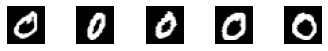

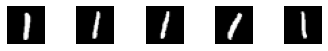

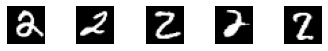

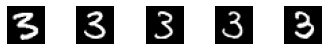

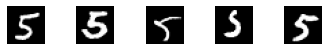

In [16]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
counter=1
for i in range(1,6):
    for j in range(1,6):
        plt.subplot(5,5,counter)
        plt.imshow(digits[(i-1)*8000+j].reshape((28,28)),cmap=cm.Greys_r)
        plt.axis('off')
        counter+=1
    plt.show()    

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale

x=mnist['data'].T
y=mnist['label'][0]

#print(x)
#print(x.shape)
#print(y)
#print(y.shape)
x=x/255.0*2-1
#print(x[0])

[-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y)
pipeline=Pipeline([('clf',SVC(kernel='rbf',gamma=0.01,C=100))])

parameters={'clf__gamma':(0.01,.03,.1,.3,1),
           'clf__C':(0.1,.3,1,3,10,30)}
grid_search=GridSearchCV(pipeline,parameters,n_jobs=3,verbose=1,scoring='accuracy')
grid_search.fit(x_train[:10000],y_train[:10000])
print('Best Score :%0.3f'%grid_search.best_score_)
print('Best parameter set : ')
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s : %r'%(param_name,best_parameters[param_name]))
    predictions=grid_search.predict(x_test)
    print(classification_report(y_test,predictions))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed: 58.9min


KeyboardInterrupt: 